# 모듈 가져오기 (IMPORT 단계)

In [2]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np


#탐색적 분석을 위한 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import shapiro

#ARIMA
from statsmodels.tsa.arima_model import ARIMA



#matplotlib 이용한 background 그래프 실행 및 결과 확인 
%matplotlib inline


#export_graphviz: 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#데이터 scaling => 거리기반 알고리즘은 필수!!!
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
# 분류 DT
from sklearn.tree import DecisionTreeRegressor
#분류  RF
from sklearn.ensemble import RandomForestClassifier
# 분류 GB
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 NN
from sklearn.neural_network import MLPClassifier

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가 
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# 한글 폰트 적용
font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

In [4]:
# 결과 창 확대
pd.set_option('display.max_rows', 100000000000) # 최대 줄 수 설정
pd.set_option('display.max_columns', 100000000000) # 최대 열 수 설정 
pd.set_option('display.width', 1000) # 표시할 가로의 길이

## 데이터 받아오기

In [117]:
# 데이터 구성하기(MFG_MACHINE)
MFG_MACHINE = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_MACHINE_NULL_COL_OUT.csv", engine="python", encoding='EUC-KR')
#MFG_MACHINE = MFG_MACHINE.drop(MFG_MACHINE.columns[0], axis=1)

In [118]:
# 데이터 구성하기(MFG_PROCESS)
MFG_PROCESS = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_PROCESS_NULL_COL_OUT.csv", engine="python", encoding='EUC-KR')
#MFG_PROCESS = MFG_PROCESS.drop(MFG_PROCESS.columns[0], axis=1)

In [119]:
# 데이터 구성하기(MFG_TAT)
MFG_TAT = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_TAT_NULL_COL_OUT.csv", engine="python",encoding='EUC-KR')
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)

In [120]:
# 데이터 구성하기(MFG_TAT)
MFG_STD = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/merge/MERGE_STD.csv", engine="python",encoding='EUC-KR')
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)
MFG_STD.head()

,LOT,JUDGE,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
0,101,0.10,0.636189,5.538706,1.078144,0.762889,17.590799,17.523281,0.661318,1.670952,1.465175,0.789987,0.550120,1.255923,0.756028,40.611975,38.948091,1.880062,0.676271,0.904303,0.216946,0.620612,1.013614,1.589097,0.128188,0.354797,0.780380,0.003007,0.043293,4.881760,3.126710,2.964261,2.337340,3.620119,3.234680,2.458069,2.125039,3.332061,1.846761,81.116161,63.372250,453.943710,134.092456,320.181573,91.283307,131.440561,0.584245,0.264774,3.524949,1.260159,2.146601,1.197761,1.066956,19.299861,3.811483,0.808442,0.896117,2.688298,2.155531,2.954907,2.409078,2.226137,1.421073,1.281231,1.046297,1.651156,1.356272,1.316894,227.074176,48.728680,58.968747,44.468173,5.565637,13.726655,2.458069,2.277464,18.749316,24.386364,264.972268,89.212874,5.104178,7.556106,34.203532,7.443825,33.372538,4.924696,627.332901,219.896746
1,102,0.05,1.025414,5.776531,0.640949,0.478237,34.110045,24.778808,0.767960,0.999092,1.201315,0.988673,0.571241,0.933852,1.025003,37.776507,37.561630,3.182100,0.735044,0.936679,0.140915,0.777610,1.242746,1.226386,0.086123,0.311671,0.948922,0.004158,0.030462,4.569925,2.470883,2.863105,2.390221,3.110255,2.680829,2.518876,2.158825,3.937338,2.345769,110.473097,36.303219,493.514941,121.199314,310.556275,105.254629,132.570250,0.982625,0.409878,3.840696,1.620031,1.524148,2.539084,1.627874,23.954290,2.910320,1.537556,0.967417,3.887155,3.174317,2.240207,3.108609,2.079625,1.026491,0.993810,1.234376,1.538112,1.496487,1.447321,222.506836,68.188902,62.258777,43.783679,4.611199,9.403247,3.388836,2.384158,25.015995,17.835506,205.687832,67.623571,44.295657,4.780443,67.170071,5.767422,31.823527,2.419221,462.337525,158.942360
2,103,0.15,1.500912,6.356304,0.611211,0.621945,19.544941,36.577552,0.728571,0.813634,1.143621,1.391100,0.771516,1.726908,0.915064,36.634529,36.410512,3.279345,3.503874,3.571005,0.158331,0.785858,1.437794,1.518459,0.053721,0.367363,0.940514,0.003483,0.027832,5.265578,3.155613,3.754296,1.538112,1.682730,1.056309,3.048295,2.183069,4.540751,3.394655,94.776524,40.192956,440.580224,189

In [11]:
# 데이터 구성하기(MFG_TAT)
MFG_STD = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/merge/MERGE_STD+MEAN.csv", engine="python",encoding='EUC-KR')
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)
MFG_STD.head()

,LOT,JUDGE,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,BLACK_RTD_TEMP_GLASS_START_std_mean,BLACK_RTD_TEMP_GLASS_END_std_mean,BLACK_RTD_TEMP_WALL_START_std_mean,BLACK_RTD_TEMP_WALL_MAX_std_mean,BLACK_RTD_PRES_START_std_mean,BLACK_RTD_PRES_END_std_mean,BLACK_RTD_TEMP_GLASS_OUT_std_mean,BLACK_RTD_TEMP_HOOD_START_std_mean,BLACK_RTD_TEMP_HOOD_MAX_std_mean,AG_RTD_TEMP_GLASS_START_std_mean,AG_RTD_TEMP_GLASS_END_std_mean,AG_RTD_TEMP_WALL_START_std_mean,AG_RTD_TEMP_WALL_MAX_std_mean,AG_RTD_PRES_START_std_mean,AG_RTD_PRES_END_std_mean,AG_RTD_TEMP_GLASS_OUT_std_mean,AG_RTD_TEMP_HOOD_START_std_mean,AG_RTD_TEMP_HOOD_MAX_std_mean,AG_EXPOSURE_TEMP_MASK_std_mean,BUS_DEVELOP_TEMP_OVEN1_std_mean,BUS_DEVELOP_TEMP_OVEN2_std_mean,BUS_DEVELOP_TEMP_OVEN3_std_mean,BUS_DEVELOP_TEMP_TANK1_std_mean,BUS_DEVELOP_TEMP_TANK2_std_mean,BUS_DEVELOP_TEMP_TANK3_std_mean,BUS_DEVELOP_PRES2_std_mean,BUS_DEVELOP_PRES3_std_mean,BUS_FIRE_TEMP_KEEP_CH01_std_mean,BUS_FIRE_TEMP_KEEP_CH02_std_mean,BUS_FIRE_TEMP_KEEP_CH03_std_mean,BUS_FIRE_TEMP_ANEAL_CH01_std_mean,BUS_FIRE_TEMP_ANEAL_CH02_std_mean,BUS_FIRE_TEMP_ANEAL_CH03_std_mean,DIELEC_FIRE_TEMP_KEEP_CH01_std_mean,DIELEC_FIRE_TEMP_ANEAL_CH01_std_mean,DIELEC_FIRE_TEMP_ANEAL_CH02_std_mean,DIELEC_FIRE_TEMP_ANEAL_CH03_std_mean,DIELEC_FIRE_EXHAUST_HEAT1_std_mean,DIELEC_FIRE_EXHAUST_HEAT2_std_mean,DIELEC_FIRE_EXHAUST_HEAT3_std_mean,DIELEC_FIRE_EXHAUST_HEAT4_std_mean,DIELEC_FIRE_EXHAUST_HEAT5_std_mean,DIELEC_FIRE_EXHAUST_HEAT6_std_mean,DIELEC_FIRE_EXHAUST_HEAT7_std_mean,PHOS_R_DRY_TEMP_GLASS_START_std_mean,PHOS_R_DRY_TEMP_GLASS_END_std_mean,PHOS_R_DRY_TEMP_WALL_START_std_mean,PHOS_R_DRY_TEMP_WALL_MAX_std_mean,PHOS_R_DRY_PRES_START_std_mean,PHOS_R_DRY_PRES_END_std_mean,PHOS_R_DRY_TEMP_GLASS_OUT_std_mean,PHOS_R_DRY_TEMP_HOOD_START_std_mean,PHOS_R_DRY_TEMP_HOOD_MAX_std_mean,PHOS_G_DRY_TEMP_GLASS_START_std_mean,PHOS_G_DRY_TEMP_GLASS_END_std_mean,PHOS_G_DRY_TEMP_WALL_START_std_mean,PHOS_G_DRY_TEMP_WALL_MAX_std_mean,PHOS_G_DRY_PRES_START_std_mean,PHOS_G_DRY_PRES_END_std_mean,PHOS_G_DRY_TEMP_GLASS_OUT_std_mean,PHOS_G_DRY_TEMP_HOOD_START_std_mean,P

In [14]:
MFG_STD

,LOT,JUDGE,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,BLACK_RTD_TEMP_GLASS_START_std_mean,BLACK_RTD_TEMP_GLASS_END_std_mean,BLACK_RTD_TEMP_WALL_START_std_mean,BLACK_RTD_TEMP_WALL_MAX_std_mean,BLACK_RTD_PRES_START_std_mean,BLACK_RTD_PRES_END_std_mean,BLACK_RTD_TEMP_GLASS_OUT_std_mean,BLACK_RTD_TEMP_HOOD_START_std_mean,BLACK_RTD_TEMP_HOOD_MAX_std_mean,AG_RTD_TEMP_GLASS_START_std_mean,AG_RTD_TEMP_GLASS_END_std_mean,AG_RTD_TEMP_WALL_START_std_mean,AG_RTD_TEMP_WALL_MAX_std_mean,AG_RTD_PRES_START_std_mean,AG_RTD_PRES_END_std_mean,AG_RTD_TEMP_GLASS_OUT_std_mean,AG_RTD_TEMP_HOOD_START_std_mean,AG_RTD_TEMP_HOOD_MAX_std_mean,AG_EXPOSURE_TEMP_MASK_std_mean,BUS_DEVELOP_TEMP_OVEN1_std_mean,BUS_DEVELOP_TEMP_OVEN2_std_mean,BUS_DEVELOP_TEMP_OVEN3_std_mean,BUS_DEVELOP_TEMP_TANK1_std_mean,BUS_DEVELOP_TEMP_TANK2_std_mean,BUS_DEVELOP_TEMP_TANK3_std_mean,BUS_DEVELOP_PRES2_std_mean,BUS_DEVELOP_PRES3_std_mean,BUS_FIRE_TEMP_KEEP_CH01_std_mean,BUS_FIRE_TEMP_KEEP_CH02_std_mean,BUS_FIRE_TEMP_KEEP_CH03_std_mean,BUS_FIRE_TEMP_ANEAL_CH01_std_mean,BUS_FIRE_TEMP_ANEAL_CH02_std_mean,BUS_FIRE_TEMP_ANEAL_CH03_std_mean,DIELEC_FIRE_TEMP_KEEP_CH01_std_mean,DIELEC_FIRE_TEMP_ANEAL_CH01_std_mean,DIELEC_FIRE_TEMP_ANEAL_CH02_std_mean,DIELEC_FIRE_TEMP_ANEAL_CH03_std_mean,DIELEC_FIRE_EXHAUST_HEAT1_std_mean,DIELEC_FIRE_EXHAUST_HEAT2_std_mean,DIELEC_FIRE_EXHAUST_HEAT3_std_mean,DIELEC_FIRE_EXHAUST_HEAT4_std_mean,DIELEC_FIRE_EXHAUST_HEAT5_std_mean,DIELEC_FIRE_EXHAUST_HEAT6_std_mean,DIELEC_FIRE_EXHAUST_HEAT7_std_mean,PHOS_R_DRY_TEMP_GLASS_START_std_mean,PHOS_R_DRY_TEMP_GLASS_END_std_mean,PHOS_R_DRY_TEMP_WALL_START_std_mean,PHOS_R_DRY_TEMP_WALL_MAX_std_mean,PHOS_R_DRY_PRES_START_std_mean,PHOS_R_DRY_PRES_END_std_mean,PHOS_R_DRY_TEMP_GLASS_OUT_std_mean,PHOS_R_DRY_TEMP_HOOD_START_std_mean,PHOS_R_DRY_TEMP_HOOD_MAX_std_mean,PHOS_G_DRY_TEMP_GLASS_START_std_mean,PHOS_G_DRY_TEMP_GLASS_END_std_mean,PHOS_G_DRY_TEMP_WALL_START_std_mean,PHOS_G_DRY_TEMP_WALL_MAX_std_mean,PHOS_G_DRY_PRES_START_std_mean,PHOS_G_DRY_PRES_END_std_mean,PHOS_G_DRY_TEMP_GLASS_OUT_std_mean,PHOS_G_DRY_TEMP_HOOD_START_std_mean,P

In [17]:
MFG_STD = MFG_STD[:-2]

In [18]:
MFG_STD.isnull().sum()

LOT                                     0
JUDGE                                   0
BLACK_RTD_TEMP_GLASS_START              0
BLACK_RTD_TEMP_GLASS_END                0
BLACK_RTD_TEMP_WALL_START               0
BLACK_RTD_TEMP_WALL_MAX                 0
BLACK_RTD_PRES_START                    0
BLACK_RTD_PRES_END                      0
BLACK_RTD_TEMP_GLASS_OUT                0
BLACK_RTD_TEMP_HOOD_START               0
BLACK_RTD_TEMP_HOOD_MAX                 0
AG_RTD_TEMP_GLASS_START                 0
AG_RTD_TEMP_GLASS_END                   0
AG_RTD_TEMP_WALL_START                  0
AG_RTD_TEMP_WALL_MAX                    0
AG_RTD_PRES_START                       0
AG_RTD_PRES_END                         0
AG_RTD_TEMP_GLASS_OUT                   0
AG_RTD_TEMP_HOOD_START                  0
AG_RTD_TEMP_HOOD_MAX                    0
AG_EXPOSURE_TEMP_MASK                   0
BUS_DEVELOP_TEMP_OVEN1                  0
BUS_DEVELOP_TEMP_OVEN2                  0
BUS_DEVELOP_TEMP_OVEN3            

In [19]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_STD.drop(["JUDGE",'LOT'], axis=1, inplace=False)
df_raw_y = MFG_STD["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
# df_x_dummy = pd.get_dummies(df_raw_x)
# df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [20]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(140, 172)
train data Y size:(140,)
test data X size:(60, 172)
test data Y size:(60,)


In [21]:
tree_final = DecisionTreeRegressor()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [22]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합

Score on training set: 1.000
Score on test set: -0.816


In [137]:
# cross_val_score(tree_final, df_test_x, df_test_y)

In [23]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
81,TAT_6PHOS_2G_1DISPENSER,0.125
97,AG_RTD_TEMP_WALL_START_std_mean,0.113
9,AG_RTD_TEMP_GLASS_START,0.108
104,AG_EXPOSURE_TEMP_MASK_std_mean,0.082
116,BUS_FIRE_TEMP_ANEAL_CH01_std_mean,0.062
128,DIELEC_FIRE_EXHAUST_HEAT6_std_mean,0.048
1,BLACK_RTD_TEMP_GLASS_END,0.046
82,TAT_6PHOS_2G_2DRY,0.040
101,AG_RTD_TEMP_GLASS_OUT_std_mean,0.040
13,AG_RTD_PRES_START,0.040


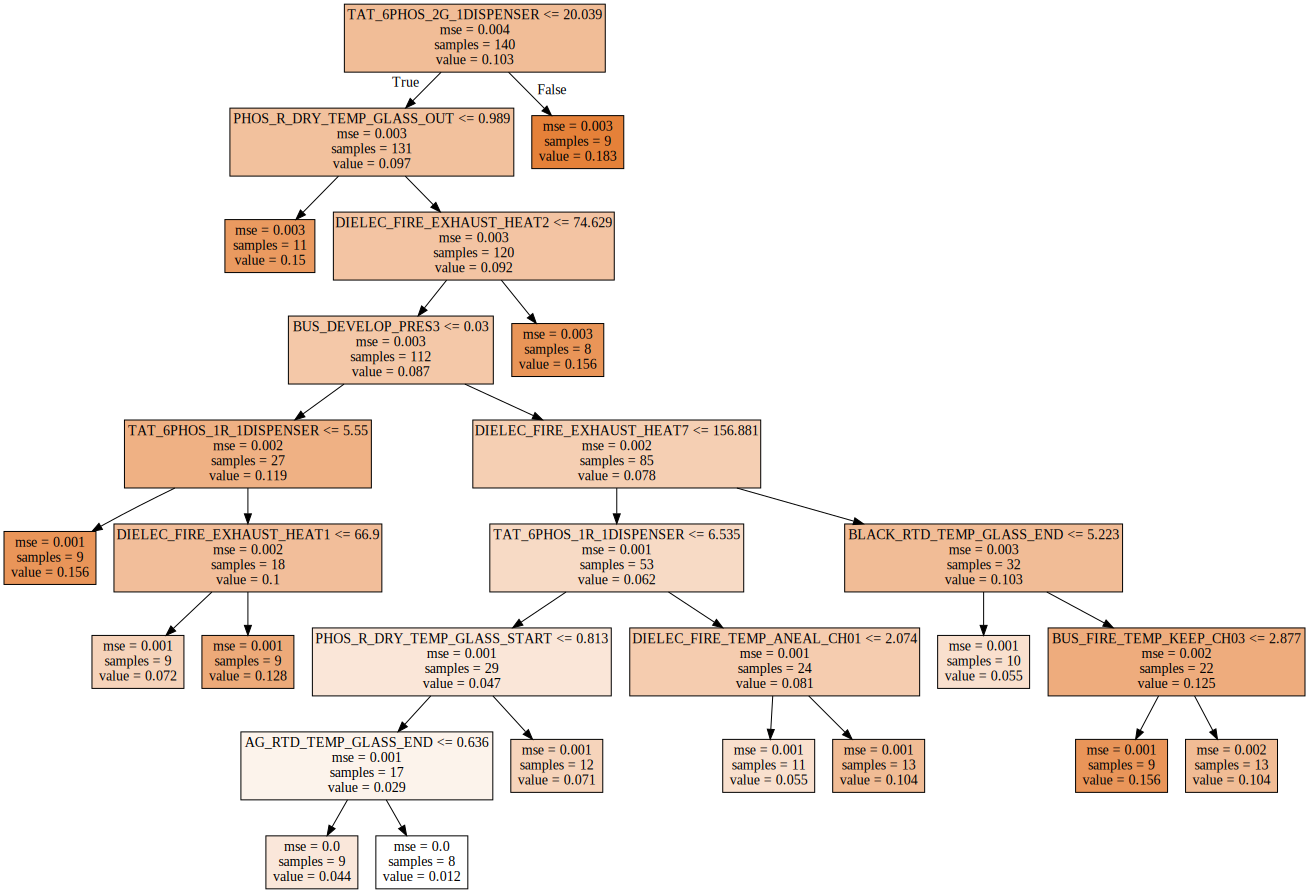

In [139]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!